In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import random
import datetime as dt
import matplotlib.pyplot as plt
# import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import gc
# del a
# gc.collect()

from matplotlib.font_manager import FontProperties
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from tqdm import tqdm

fontproperties = FontProperties(fname = 'font_ch.ttf', size = 14)
font = 'font_ch.ttf'




In [2]:
###columns
inventory_cols = ['day','item_id','warehouse_id','warehouse_city_id','total_begin_qty','total_end_qty','Replen_in_qty',
                  'transfer_in_qty','sale_out_qty','transfer_out_qty']
item_cols = ['date','item_id','front_page_item_id','merchant_id','brand_id','category_id','sub_category_id','pc_pv',
             'app_pv','pc_uv','app_uv','if_cainiao']
logistic_cols = ['order_id','order_date','logistic_order_id','action','facility_id','facility_type','city_id',
                 'logistic_company_id','timestamp']
order_cols = ['day','order_id','item_det_info','pay_timestamp','buyer_id','promise_speed','if_cainiao','merchant_id',
              'Logistics_review_score']
seller_cols = ['day','merchant_id','subcategory_id','pc_pv','pc_uv','app_pv','app_uv','avg_logistic_review_score',
              'avg_order_quality_score','avg_service_quality_score','if_cainiao']

# print('=== inventory ===')
# inventory = pd.read_csv('msom_inventory_data.csv', header=None)
# inventory.columns = inventory_cols
# inventory.shape
# inventory.head()


# print('=== item ===')
# item = pd.read_csv('msom_item_data.csv', header=None) 
# item.columns = item_cols
# item.shape
# item.head()


print('=== order ===')
order = pd.read_csv('msom_order_data_1.csv', header=None)
order.columns = order_cols
# order = order.drop(['day','item_det_info','buyer_id','promise_speed','if_cainiao','merchant_id'], axis=1)
order = order[~order['Logistics_review_score'].isnull()]
# for i in tqdm(range(2, 8)):
#     order_ = pd.read_csv(f'msom_order_data_{i}.csv', header=None)
#     order_.columns = order_cols
#     order_ = order_.drop(['day','item_det_info','buyer_id','promise_speed','if_cainiao','merchant_id'], axis=1)
#     order_ = order_[~order_['Logistics_review_score'].isnull()]
#     order = pd.concat([order, order_])

order.shape
order.head()


print('=== logistic ===')
logistic = pd.read_csv('msom_logistic_detail_1.csv', header=None)
logistic.columns = logistic_cols
logistic = pd.merge(logistic, order, on='order_id', how='left')
logistic = logistic[~logistic['Logistics_review_score'].isnull()]
logistic = logistic.drop_duplicates()
logistic.shape
logistic.head()

# logistic = []
# with open('msom_logistic_detail_1.csv', encoding='utf-8') as f:
#     for line in f.readlines():
#         line = line.strip()
#         features = line.split(',')
#         logistic.append(features)
# logistic = pd.DataFrame(logistic)

# def importdata_logistic(filename):
#     logistic = pd.read_csv(filename, header=None) 
#     logistic.columns = logistic_cols
#     logistic = logistic.drop(['logistic_order_id','facility_id','facility_type','city_id','logistic_company_id'], axis=1)
#     logistic.shape
#     logistic.head()
#     return logistic


# stats_logistic = []
# print('=== stats_logistic ===')
# for i in tqdm(range(1, 8)):
#     logistic = importdata_logistic(f'msom_logistic_detail_{i}.csv')
#     logistic.shape
#     logistic = pd.merge(logistic, order, on='order_id', how='left')
#     logistic.shape
#     logistic = logistic[~logistic['Logistics_review_score'].isnull()]
#     logistic = logistic.drop_duplicates()
#     stats_logistic_ = logistic.groupby(['Logistics_review_score']).size().reset_index()
#     stats_logistic_
#     stats_logistic.append(stats_logistic_)
#     del logistic
#     gc.collect()


# print('=== seller ===')
# seller = pd.read_csv('msom_seller_data.csv', header=None) 
# seller.columns = seller_cols
# seller.shape
# seller.head()




=== order ===


(5000601, 9)

,day,order_id,item_det_info,pay_timestamp,buyer_id,promise_speed,if_cainiao,merchant_id,Logistics_review_score
0,20170101,488,86889:1:1152.11,2017-01-01 13:07:00,73376137,3.0,1,505,5.0
3,20170101,6827,182517:1:965.21,2017-01-01 13:13:00,41670373,0.0,1,42,5.0
4,20170101,10231,154345:1:74.77,2017-01-01 17:19:00,31580563,NaN,0,3,5.0
5,20170101,10233,87290:1:6.99,2017-01-01 22:52:00,26867950,NaN,0,501,5.0
6,20170101,10383,101232:1:20.39,2017-01-01 14:14:00,9447868,NaN,0,90,3.0


=== logistic ===


(53471840, 17)

,order_id,order_date,logistic_order_id,action,facility_id,facility_type,city_id,logistic_company_id,timestamp,day,item_det_info,pay_timestamp,buyer_id,promise_speed,if_cainiao,merchant_id,Logistics_review_score
3,31846983,20170107,14697151,GOT,NaN,NaN,NaN,430,2017-01-07 18:39:00,20170107.0,205402:10:51653.08,2017-01-07 14:41:00,4368448.0,NaN,0.0,180.0,5.0
4,31846983,20170107,14697151,ARRIVAL,NaN,NaN,NaN,430,2017-01-07 20:44:00,20170107.0,205402:10:51653.08,2017-01-07 14:41:00,4368448.0,NaN,0.0,180.0,5.0
5,31846983,20170107,14697151,SIGNED,NaN,NaN,NaN,430,2017-01-08 16:35:00,20170107.0,205402:10:51653.08,2017-01-07 14:41:00,4368448.0,NaN,0.0,180.0,5.0
6,31846983,20170107,14697151,TRADE_SUCCESS,NaN,NaN,NaN,430,2017-01-17 17:05:00,20170107.0,205402:10:51653.08,2017-01-07 14:41:00,4368448.0,NaN,0.0,180.0,5.0
7,31846983,20170107,14697151,CONSIGN,NaN,NaN,NaN,430,2017-01-07 17:05:00,20170107.0,205402:10:51653.08,2017-01-07 14:41:00,4368448.0,NaN,0.0,180.0,5.0


### EDA
(原始資料筆數過多，目前先抽樣100000筆不重複訂單當作觀察)

數值指標/維度：
- 物流評分
- 運送天數
- 運送商品數
- 訂單總金額
- ~~該 merchant 的平均物流評分~~
- ~~該 merchant 的平均流量~~

類別維度：
- 下訂單時間
    - 月份
    - 星期幾
    - 日期(月初、月中、月末)
- 到貨時間
    - 月份
    - 星期幾
    - 日期(月初、月中、月末)

    
``` 
`order.csv`
- Different items are separated by “;”
- the information for each item is separated by “:” (item_id:quantity:payment_amount)
- Payment amount = total payment for all quantity of this item
```
    

In [4]:
### 算出各定單的運送時長

sent_times = []
for oid in tqdm(random.sample(logistic.order_id.unique().tolist(), 100000)):
    tmp = logistic[logistic['order_id']==oid]
    reviewscore = tmp.Logistics_review_score.values[0]
    try:
        end_time = tmp[tmp['action']=='SIGNED'].timestamp.values[-1]
    except:
        pass
    start_time = tmp.pay_timestamp.values[0]
    duration = dt.datetime.strptime(end_time, '%Y-%m-%d %H:%M:%S') - dt.datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')
    sent_times.append([oid, reviewscore, duration.days])

df_sent_times = pd.DataFrame(sent_times, columns=['order_id','Logistics_review_score','sent_duration'])
df_sent_times = df_sent_times[df_sent_times['sent_duration']>=0]
df_sent_times['sent_duration'] = np.where(df_sent_times['sent_duration']>=10, '10+', df_sent_times['sent_duration'])
df_sent_times.to_csv('df_sent_times.csv', index=False)
logistic = logistic[logistic['order_id'].isin(df_sent_times.order_id.unique())]
logistic.to_csv('logistic_sampled.csv', index=False)
order = order[order['order_id'].isin(df_sent_times.order_id.unique())]
order.to_csv('order_sampled.csv', index=False)
df_sent_times.groupby(['sent_duration']).size().reset_index().rename(columns={0: 'count'})

sent_duration_0day = df_sent_times[df_sent_times['sent_duration']=='0'].order_id.unique(); print(sent_duration_0day.shape)
sent_duration_1day = df_sent_times[df_sent_times['sent_duration']=='1'].order_id.unique(); print(sent_duration_1day.shape)
sent_duration_2day = df_sent_times[df_sent_times['sent_duration']=='2'].order_id.unique(); print(sent_duration_2day.shape)
sent_duration_3day = df_sent_times[df_sent_times['sent_duration']=='3'].order_id.unique(); print(sent_duration_3day.shape)
sent_duration_4day = df_sent_times[df_sent_times['sent_duration']=='4'].order_id.unique(); print(sent_duration_4day.shape)
sent_duration_5day = df_sent_times[df_sent_times['sent_duration']=='5'].order_id.unique(); print(sent_duration_5day.shape)
sent_duration_6day = df_sent_times[df_sent_times['sent_duration']=='6'].order_id.unique(); print(sent_duration_6day.shape)
sent_duration_7day = df_sent_times[df_sent_times['sent_duration']=='7'].order_id.unique(); print(sent_duration_7day.shape)
sent_duration_8day = df_sent_times[df_sent_times['sent_duration']=='8'].order_id.unique(); print(sent_duration_8day.shape)
sent_duration_9day = df_sent_times[df_sent_times['sent_duration']=='9'].order_id.unique(); print(sent_duration_9day.shape)
sent_duration_10dayup = df_sent_times[df_sent_times['sent_duration']=='10+'].order_id.unique(); print(sent_duration_10dayup.shape)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [1:38:15<00:00, 16.96it/s]


,sent_duration,count
0,0,4560
1,1,18505
2,10+,3804
3,2,24086
4,3,19960
5,4,12017
6,5,6809
7,6,4005
8,7,2594
9,8,1832


(4560,)
(18505,)
(24086,)
(19960,)
(12017,)
(6809,)
(4005,)
(2594,)
(1832,)
(1153,)
(3804,)


#### 物流評分分布

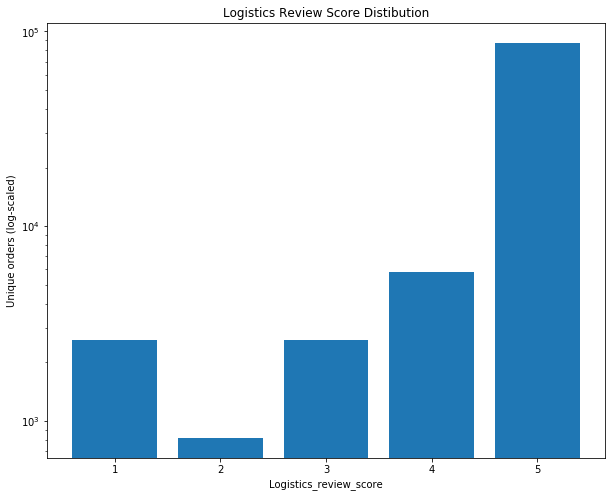

In [5]:
tmp_df_1 = df_sent_times.groupby(['Logistics_review_score']).size().reset_index().rename(columns={0: 'count'})
tmp_df_1

plt.figure(figsize=(10,8))
plt.bar(tmp_df_1['Logistics_review_score'].values, tmp_df_1['count'].values)
plt.yscale('log')
plt.xlabel('Logistics_review_score')
plt.ylabel('Unique orders (log-scaled)')
plt.title('Logistics Review Score Distibution')
plt.show();



#### 運送天數

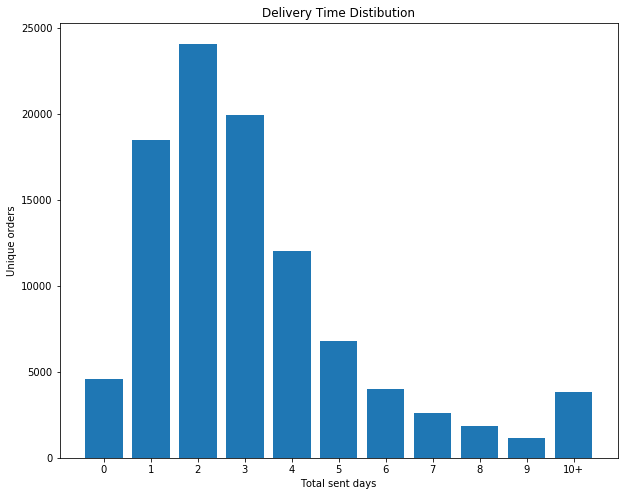

In [7]:
tmp_df_2 = df_sent_times.groupby(['sent_duration']).size().reset_index().rename(columns={0: 'count'})
tmp_df_2['sent_duration'] = pd.Categorical(tmp_df_2['sent_duration'], categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+'])
tmp_df_2 = tmp_df_2.sort_values('sent_duration')
tmp_df_2

plt.figure(figsize=(10,8))
plt.bar(tmp_df_2['sent_duration'].values, tmp_df_2['count'].values)
plt.xlabel('Total sent days')
plt.ylabel('Unique orders')
plt.title('Delivery Time Distibution')
plt.show();


#### 不重複商品數

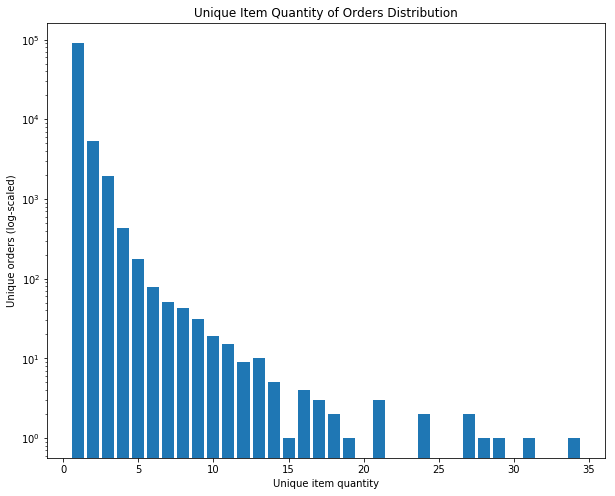

In [8]:
tmp_df_3 = pd.DataFrame({
    'order_id': order.order_id,
    'item': order.item_det_info.str.split(';').explode()
})
df_sent_times = pd.merge(df_sent_times, tmp_df_3.groupby(['order_id']).size().reset_index().rename(columns={0: 'items'}), 
                         on='order_id', how='left')
tmp_df_3 = df_sent_times.groupby('items').size().reset_index().rename(columns={0: 'count'})
tmp_df_3

plt.figure(figsize=(10,8))
plt.bar(tmp_df_3['items'].values, tmp_df_3['count'].values)
plt.yscale('log')
plt.ylabel('Unique orders (log-scaled)')
plt.xlabel('Unique item quantity')
plt.title('Unique Item Quantity of Orders Distribution')
plt.show();


#### 訂單總商品數、總金額

In [9]:
tmp_df_3 = pd.DataFrame({
    'order_id': order.order_id,
    'item': order.item_det_info.str.split(';').explode()
})
tmp_df_3 = tmp_df_3.reset_index()
tmp_df_4 = pd.DataFrame(tmp_df_3['item'].str.split(':').to_list(), columns=['item_id','quantity','payment_amount'])
tmp_df_4['quantity'] = tmp_df_4['quantity'].astype(int)
tmp_df_4['payment_amount'] = tmp_df_4['payment_amount'].astype(float)
tmp_df_4 = pd.concat([tmp_df_3[['order_id']], tmp_df_4], axis=1)
df_sent_times = pd.merge(df_sent_times, tmp_df_4.groupby(['order_id'])['quantity'].sum().reset_index(), 
                         on='order_id', how='left')
df_sent_times = pd.merge(df_sent_times, tmp_df_4.groupby(['order_id'])['payment_amount'].sum().reset_index().rename(columns={'payment_amount': 'purchase_value'}), 
                         on='order_id', how='left')
df_sent_times




,order_id,Logistics_review_score,sent_duration,items,quantity,purchase_value
0,603360,3.0,4,1,1,14.16
1,67750712,5.0,1,1,1,195.31
2,49392394,5.0,3,1,1,22.74
3,95606781,5.0,1,1,1,102.80
4,118745768,5.0,3,1,1,22.76
...,...,...,...,...,...,...
99320,83021333,5.0,9,1,1,27.46
99321,102170612,5.0,8,1,1,6.51
99322,31669796,5.0,2,1,1,55.56
99323,78755004,5.0,3,1,1,20.36


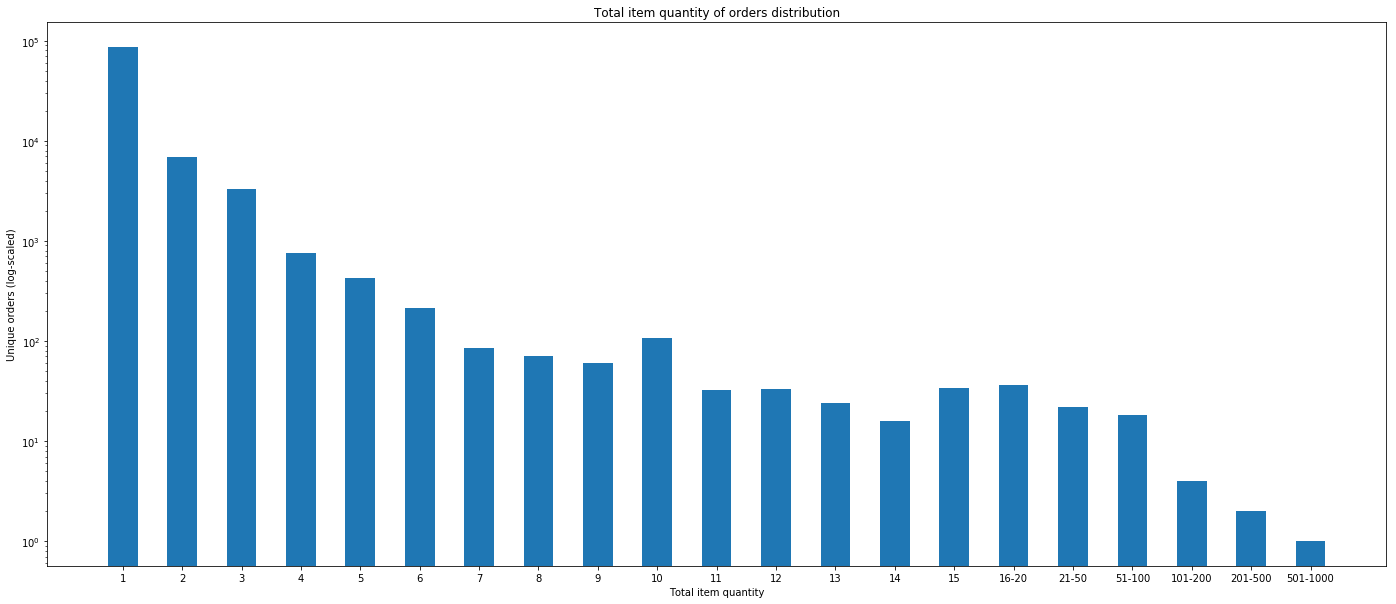

In [10]:
tmp_df_4 = df_sent_times.groupby(['quantity']).size().reset_index().rename(columns={0: 'count'})
quantity_list = [tmp_df_4['quantity'],'16-20','21-50','51-100','101-200','201-500','501-1000','1001-2000','2000+']
cond_list = [
    tmp_df_4['quantity']<=15,
    (tmp_df_4['quantity']>=16)&(tmp_df_4['quantity']<=20), 
    (tmp_df_4['quantity']>=21)&(tmp_df_4['quantity']<=50), 
    (tmp_df_4['quantity']>=51)&(tmp_df_4['quantity']<=100), 
    (tmp_df_4['quantity']>=101)&(tmp_df_4['quantity']<=200), 
    (tmp_df_4['quantity']>=201)&(tmp_df_4['quantity']<=500), 
    (tmp_df_4['quantity']>=501)&(tmp_df_4['quantity']<=1000), 
    (tmp_df_4['quantity']>=1001)&(tmp_df_4['quantity']<=2000), 
    tmp_df_4['quantity']>=2000
]
tmp_df_4['quantity_category'] = np.select(condlist=cond_list, choicelist=quantity_list, default='none')
tmp_df_4['quantity_category'] = tmp_df_4['quantity_category'].astype(str)
tmp_df_4

plt.figure(figsize=(24,10))
plt.bar(tmp_df_4['quantity_category'].values, tmp_df_4['count'].values, width=0.5)
plt.yscale('log')
plt.ylabel('Unique orders (log-scaled)')
plt.xlabel('Total item quantity')
plt.title('Total item quantity of orders distribution')
plt.show();



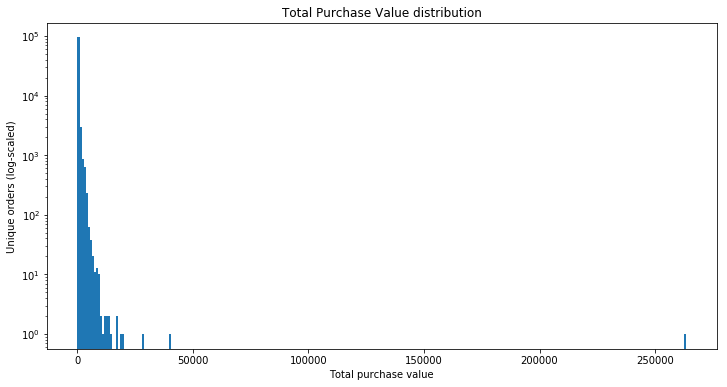

In [20]:
# value_list = [df_sent_times['purchase_value'],'10001-15000','15001-20000','20001-25000','25001-50000','50000+']
# cond_list = [
#     df_sent_times['purchase_value']<=10000,
#     (df_sent_times['purchase_value']>=10001)&(df_sent_times['purchase_value']<=15000), 
#     (df_sent_times['purchase_value']>=15001)&(df_sent_times['purchase_value']<=20000), 
#     (df_sent_times['purchase_value']>=20001)&(df_sent_times['purchase_value']<=25000), 
#     (df_sent_times['purchase_value']>=25001)&(df_sent_times['purchase_value']<=50000), 
#     df_sent_times['purchase_value']>=50000
# ]
# df_sent_times['purchase_value_category'] = np.select(condlist=cond_list, choicelist=value_list, default='none')
# df_sent_times['purchase_value_category'] = df_sent_times['purchase_value_category'].astype(str)
# df_sent_times

plt.figure(figsize=(12,6))
plt.hist(df_sent_times['purchase_value'].values, bins=300)#, range=[0,100000])
plt.yscale('log')
plt.ylabel('Unique orders (log-scaled)')
plt.xlabel('Total purchase value')
plt.title('Total Purchase Value distribution')
plt.show();



#### 下訂單時間、到貨時間 所獲用戶物流評分的比例


In [113]:
# order_arrival = logistic[logistic['action']=='SIGNED'][['order_id','action','timestamp']]
# order_arrival['month'] = order_arrival['timestamp'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)
# order_arrival['dayOfWeek'] = order_arrival['timestamp'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday()+1)
# order_arrival['day'] = order_arrival['timestamp'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').day)
# order_arrival['hour'] = order_arrival['timestamp'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)
# order['month'] = order['pay_timestamp'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)
# order['dayOfWeek'] = order['pay_timestamp'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday()+1)
# order['day'] = order['pay_timestamp'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').day)
# order['hour'] = order['pay_timestamp'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)

# md_condlist = [
#     order_arrival['day']<=10,
#     (order_arrival['day']>=11)&(order_arrival['day']<=20),
#     order_arrival['day']>=21
# ]
# md_choslist = ['begin-month','mid-month','bottom-month']
# order_arrival['month_duration'] = np.select(condlist=md_condlist, choicelist=md_choslist, default='None')
# md_condlist = [
#     order['day']<=10,
#     (order['day']>=11)&(order['day']<=20),
#     order['day']>=21
# ]
# md_choslist = ['begin-month','mid-month','bottom-month']
# order['month_duration'] = np.select(condlist=md_condlist, choicelist=md_choslist, default='None')

# dd_condlist = [
#     order_arrival['hour']<=5,
#     (order_arrival['hour']>=6)&(order_arrival['hour']<=11),
#     (order_arrival['hour']>=12)&(order_arrival['hour']<=17),
#     order_arrival['hour']>=18
# ]
# dd_choslist = ['midnight','morning','afternoon','evening']  # 6-11, 12-17, 18-23, 0-5 (GMT+8)
# order_arrival['day_duration'] = np.select(condlist=dd_condlist, choicelist=dd_choslist, default='None')
# dd_condlist = [
#     order['hour']<=5,
#     (order['hour']>=6)&(order['hour']<=11),
#     (order['hour']>=12)&(order['hour']<=17),
#     order['hour']>=18
# ]
# dd_choslist = ['midnight','morning','afternoon','evening']  # 6-11, 12-17, 18-23, 0-5 (GMT+8)
# order['day_duration'] = np.select(condlist=dd_condlist, choicelist=dd_choslist, default='None')

# df_sent_times = pd.merge(df_sent_times, order[['order_id','month','dayOfWeek','month_duration','day_duration']], 
#                          on='order_id', how='left')
# df_sent_times = df_sent_times.rename(columns={
#     'month': 'order_month',
#     'dayOfWeek': 'order_dayOfWeek',
#     'month_duration': 'order_month_duration',
#     'day_duration': 'order_day_duration'
# })

# df_sent_times = pd.merge(df_sent_times, order_arrival[['order_id','month','dayOfWeek','month_duration','day_duration']], 
#                          on='order_id', how='left')
# df_sent_times = df_sent_times.rename(columns={
#     'month': 'signed_month',
#     'dayOfWeek': 'signed_dayOfWeek',
#     'month_duration': 'signed_month_duration',
#     'day_duration': 'signed_day_duration'
# })
# df_sent_times = df_sent_times[~df_sent_times['signed_dayOfWeek'].isnull()]

df_sent_times.head()

,order_id,Logistics_review_score,sent_duration,items,quantity,purchase_value,purchase_value_category,order_dayOfWeek,order_month_duration,order_day_duration,signed_dayOfWeek,signed_month_duration,signed_day_duration,order_month,signed_month
0,603360,3.0,4,1,1,14.16,14.16,1,begin-month,morning,5.0,begin-month,evening,1,1.0
1,67750712,5.0,1,1,1,195.31,195.31,1,begin-month,afternoon,2.0,begin-month,afternoon,1,1.0
2,49392394,5.0,3,1,1,22.74,22.74,1,begin-month,evening,5.0,mid-month,afternoon,1,1.0
3,95606781,5.0,1,1,1,102.80,102.8,5,begin-month,morning,6.0,begin-month,evening,1,1.0
4,118745768,5.0,3,1,1,22.76,22.76,7,mid-month,afternoon,3.0,mid-month,afternoon,1,1.0


##### 星期幾

,order_month,count
0,1,102698


,order_dayOfWeek,count
0,1,17645
1,2,17619
2,3,14476
3,4,11600
4,5,10268
5,6,9988
6,7,21102


,order_month_duration,count
0,begin-month,51438
1,bottom-month,12361
2,mid-month,38899


,order_day_duration,count
0,afternoon,37127
1,evening,33379
2,midnight,7337
3,morning,24855


,signed_month,count
0,1.0,93435
1,2.0,8512
2,11.0,6
3,12.0,4


,signed_dayOfWeek,count
0,1.0,14557
1,2.0,15502
2,3.0,16010
3,4.0,15863
4,5.0,15038
5,6.0,12848
6,7.0,12139


,signed_month_duration,count
0,begin-month,41858
1,bottom-month,13353
2,mid-month,46746


,signed_day_duration,count
0,afternoon,56293
1,evening,32778
2,midnight,204
3,morning,12682


<Figure size 1152x576 with 0 Axes>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

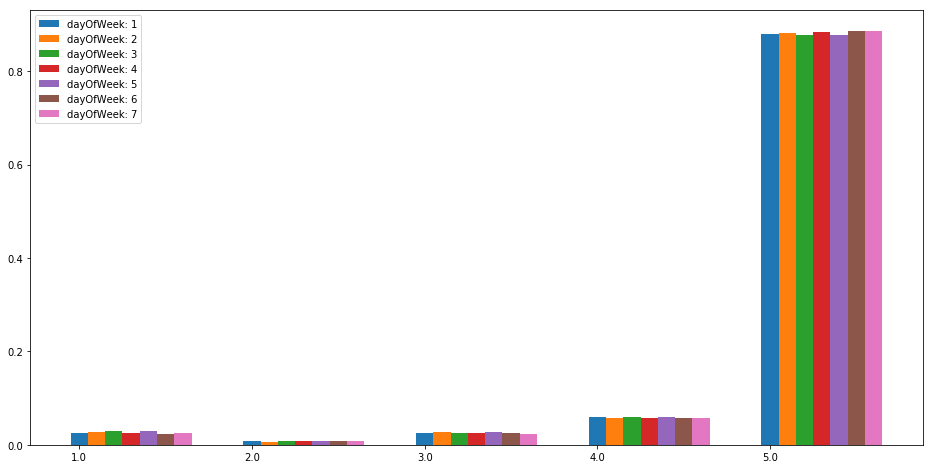

<Figure size 1152x576 with 0 Axes>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

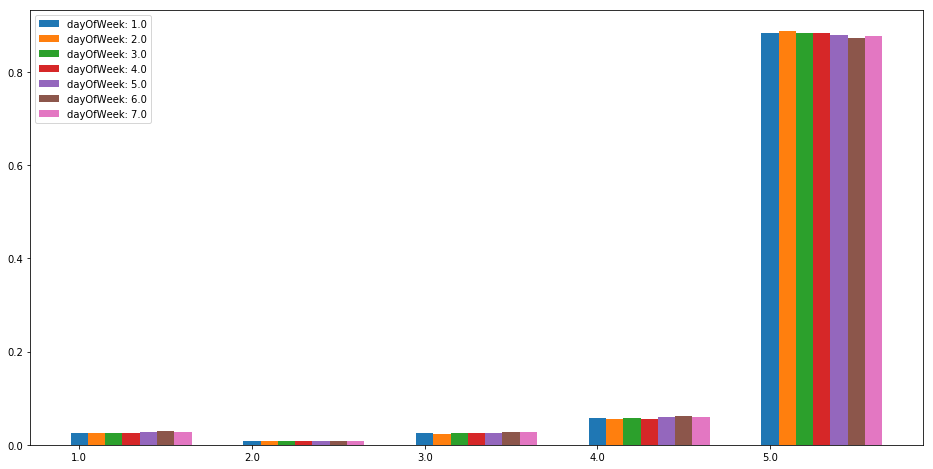

In [147]:
df_sent_times.groupby('order_month').size().reset_index().rename(columns={0: 'count'})
df_sent_times.groupby('order_dayOfWeek').size().reset_index().rename(columns={0: 'count'})
df_sent_times.groupby('order_month_duration').size().reset_index().rename(columns={0: 'count'})
df_sent_times.groupby('order_day_duration').size().reset_index().rename(columns={0: 'count'})
df_sent_times.groupby('signed_month').size().reset_index().rename(columns={0: 'count'})
df_sent_times.groupby('signed_dayOfWeek').size().reset_index().rename(columns={0: 'count'})
df_sent_times.groupby('signed_month_duration').size().reset_index().rename(columns={0: 'count'})
df_sent_times.groupby('signed_day_duration').size().reset_index().rename(columns={0: 'count'})

x_vals = range(5)
plt.figure(figsize=(16, 8))
plt.bar([x-0.1*3 for x in x_vals], 
        df_sent_times[df_sent_times['order_dayOfWeek']==1].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['order_dayOfWeek']==1].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1, 
        tick_label=sorted(df_sent_times.Logistics_review_score.unique().tolist()))
plt.bar([x-0.1*2 for x in x_vals], 
        df_sent_times[df_sent_times['order_dayOfWeek']==2].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['order_dayOfWeek']==2].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.bar([x-0.1 for x in x_vals], 
        df_sent_times[df_sent_times['order_dayOfWeek']==3].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['order_dayOfWeek']==3].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.bar([x for x in x_vals], 
        df_sent_times[df_sent_times['order_dayOfWeek']==4].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['order_dayOfWeek']==4].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.bar([x+0.1 for x in x_vals], 
        df_sent_times[df_sent_times['order_dayOfWeek']==5].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['order_dayOfWeek']==5].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.bar([x+0.1*2 for x in x_vals], 
        df_sent_times[df_sent_times['order_dayOfWeek']==6].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['order_dayOfWeek']==6].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.bar([x+0.1*3 for x in x_vals], 
        df_sent_times[df_sent_times['order_dayOfWeek']==7].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['order_dayOfWeek']==7].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.legend(['dayOfWeek: '+str(x) for x in sorted(df_sent_times.order_dayOfWeek.unique().tolist())], loc="upper left")
plt.show()


plt.figure(figsize=(16, 8))
plt.bar([x-0.1*3 for x in x_vals], 
        df_sent_times[df_sent_times['signed_dayOfWeek']==1].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['signed_dayOfWeek']==1].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1, 
        tick_label=sorted(df_sent_times.Logistics_review_score.unique().tolist()))
plt.bar([x-0.1*2 for x in x_vals], 
        df_sent_times[df_sent_times['signed_dayOfWeek']==2].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['signed_dayOfWeek']==2].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.bar([x-0.1 for x in x_vals], 
        df_sent_times[df_sent_times['signed_dayOfWeek']==3].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['signed_dayOfWeek']==3].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.bar([x for x in x_vals], 
        df_sent_times[df_sent_times['signed_dayOfWeek']==4].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['signed_dayOfWeek']==4].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.bar([x+0.1 for x in x_vals], 
        df_sent_times[df_sent_times['signed_dayOfWeek']==5].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['signed_dayOfWeek']==5].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.bar([x+0.1*2 for x in x_vals], 
        df_sent_times[df_sent_times['signed_dayOfWeek']==6].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['signed_dayOfWeek']==6].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.bar([x+0.1*3 for x in x_vals], 
        df_sent_times[df_sent_times['signed_dayOfWeek']==7].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['signed_dayOfWeek']==7].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.legend(['dayOfWeek: '+str(x) for x in sorted(df_sent_times.signed_dayOfWeek.unique().tolist())], loc="upper left")
plt.show()


##### 日期 (月初、月中、月末)

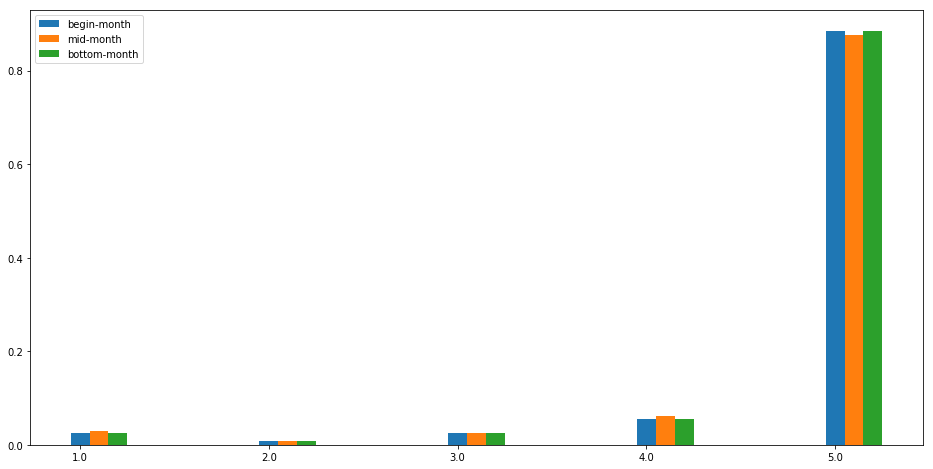

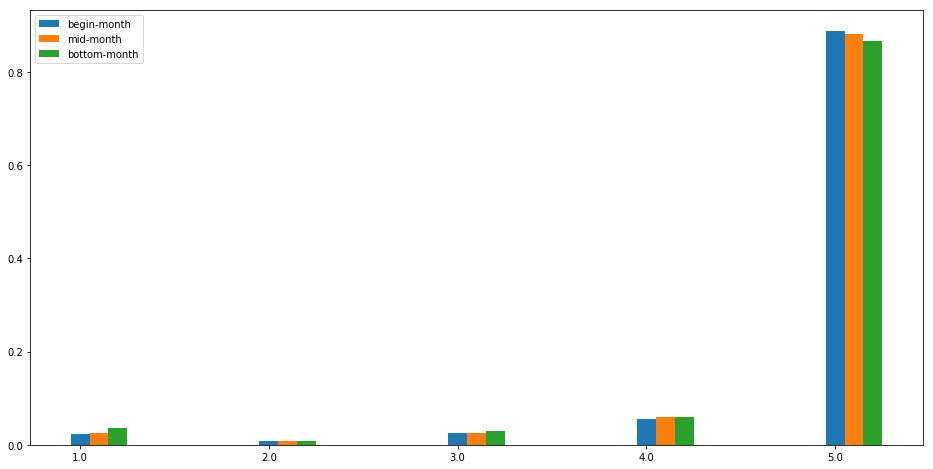

In [148]:
x_vals = range(5)
plt.figure(figsize=(16, 8))
plt.bar([x-0.1*3 for x in x_vals], 
        df_sent_times[df_sent_times['order_month_duration']=='begin-month'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['order_month_duration']=='begin-month'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1, 
        tick_label=sorted(df_sent_times.Logistics_review_score.unique().tolist()))
plt.bar([x-0.1*2 for x in x_vals], 
        df_sent_times[df_sent_times['order_month_duration']=='mid-month'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['order_month_duration']=='mid-month'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.bar([x-0.1 for x in x_vals], 
        df_sent_times[df_sent_times['order_month_duration']=='bottom-month'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['order_month_duration']=='bottom-month'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.legend(['begin-month','mid-month','bottom-month'], loc="upper left")
plt.show()


x_vals = range(5)
plt.figure(figsize=(16, 8))
plt.bar([x-0.1*3 for x in x_vals], 
        df_sent_times[df_sent_times['signed_month_duration']=='begin-month'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['signed_month_duration']=='begin-month'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1, 
        tick_label=sorted(df_sent_times.Logistics_review_score.unique().tolist()))
plt.bar([x-0.1*2 for x in x_vals], 
        df_sent_times[df_sent_times['signed_month_duration']=='mid-month'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['signed_month_duration']=='mid-month'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.bar([x-0.1 for x in x_vals], 
        df_sent_times[df_sent_times['signed_month_duration']=='bottom-month'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['signed_month_duration']=='bottom-month'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.legend(['begin-month','mid-month','bottom-month'], loc="upper left")
plt.show();



##### 一天中時段

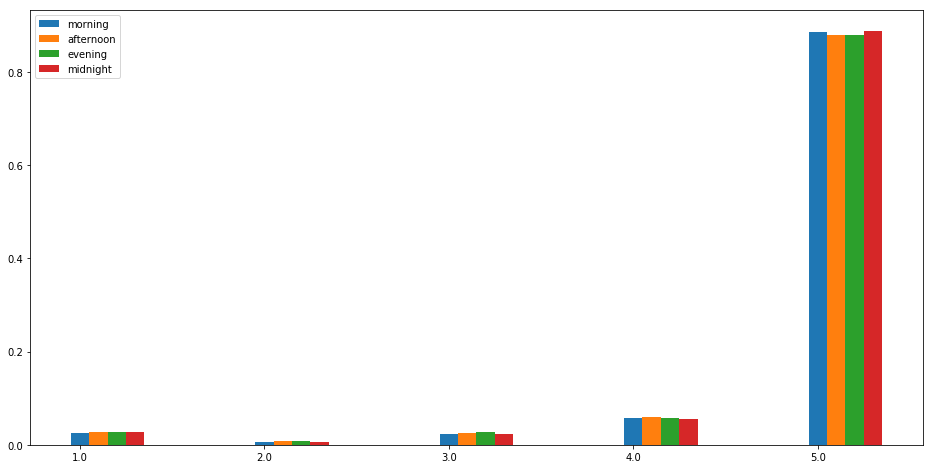

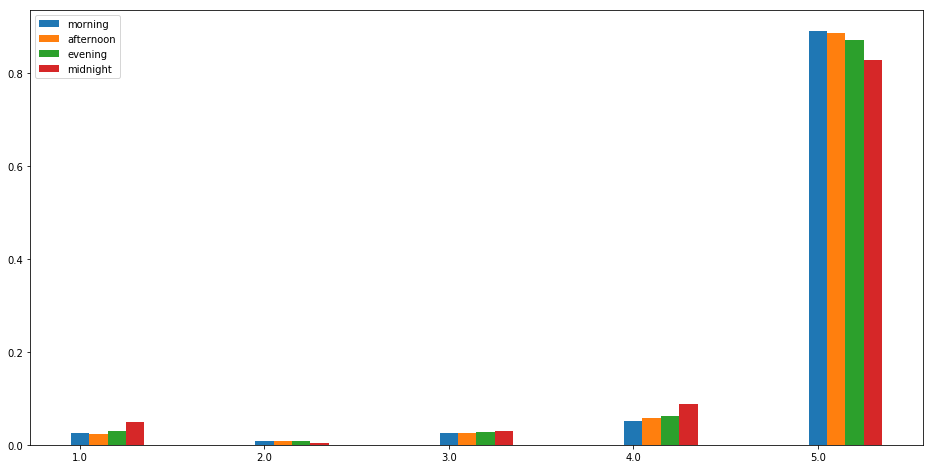

In [149]:
x_vals = range(5)
plt.figure(figsize=(16, 8))
plt.bar([x-0.1*2 for x in x_vals], 
        df_sent_times[df_sent_times['order_day_duration']=='morning'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['order_day_duration']=='morning'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1, 
        tick_label=sorted(df_sent_times.Logistics_review_score.unique().tolist()))
plt.bar([x-0.1 for x in x_vals], 
        df_sent_times[df_sent_times['order_day_duration']=='afternoon'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['order_day_duration']=='afternoon'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.bar([x for x in x_vals], 
        df_sent_times[df_sent_times['order_day_duration']=='evening'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['order_day_duration']=='evening'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.bar([x+0.1 for x in x_vals], 
        df_sent_times[df_sent_times['order_day_duration']=='midnight'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['order_day_duration']=='midnight'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.legend(['morning','afternoon','evening','midnight'], loc="upper left")
plt.show()


x_vals = range(5)
plt.figure(figsize=(16, 8))
plt.bar([x-0.1*2 for x in x_vals], 
        df_sent_times[df_sent_times['signed_day_duration']=='morning'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['signed_day_duration']=='morning'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1, 
        tick_label=sorted(df_sent_times.Logistics_review_score.unique().tolist()))
plt.bar([x-0.1 for x in x_vals], 
        df_sent_times[df_sent_times['signed_day_duration']=='afternoon'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['signed_day_duration']=='afternoon'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.bar([x for x in x_vals], 
        df_sent_times[df_sent_times['signed_day_duration']=='evening'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['signed_day_duration']=='evening'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.bar([x+0.1 for x in x_vals], 
        df_sent_times[df_sent_times['signed_day_duration']=='midnight'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['signed_day_duration']=='midnight'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.1)
plt.legend(['morning','afternoon','evening','midnight'], loc="upper left")
plt.show();



#### 不同用戶物流評分中，運送天數所佔比例

,order_id,Logistics_review_score,sent_duration,items,quantity,purchase_value,purchase_value_category,order_dayOfWeek,order_month_duration,order_day_duration,signed_dayOfWeek,signed_month_duration,signed_day_duration,order_month,signed_month
0,603360,3.0,4,1,1,14.16,14.16,1,begin-month,morning,5.0,begin-month,evening,1,1.0
1,67750712,5.0,1,1,1,195.31,195.31,1,begin-month,afternoon,2.0,begin-month,afternoon,1,1.0
2,49392394,5.0,3,1,1,22.74,22.74,1,begin-month,evening,5.0,mid-month,afternoon,1,1.0
3,95606781,5.0,1,1,1,102.80,102.8,5,begin-month,morning,6.0,begin-month,evening,1,1.0
4,118745768,5.0,3,1,1,22.76,22.76,7,mid-month,afternoon,3.0,mid-month,afternoon,1,1.0


,sent_duration,count
0,0,4824
1,1,19290
2,10+,4041
3,2,24695
4,3,20377
5,4,12289
6,5,7072
7,6,4274
8,7,2729
9,8,1870


<Figure size 1152x576 with 0 Axes>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

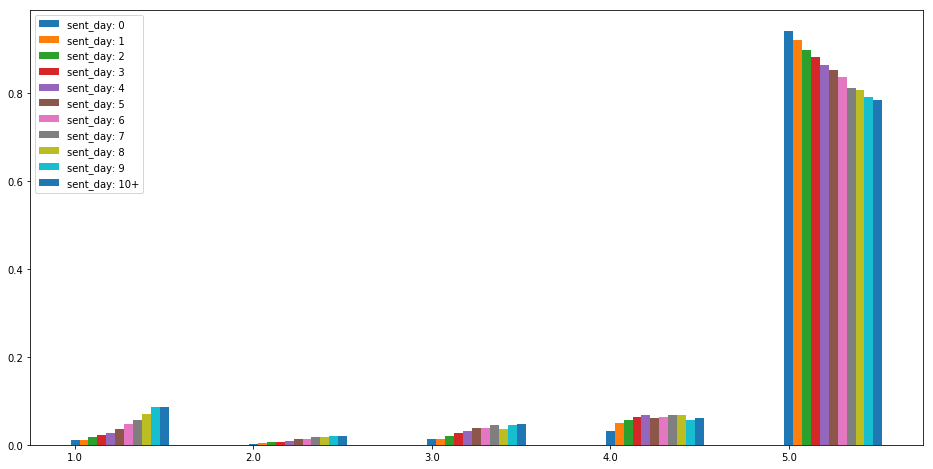

In [146]:
df_sent_times.head()
df_sent_times.groupby('sent_duration').size().reset_index().rename(columns={0: 'count'})

x_vals = range(5)
plt.figure(figsize=(16, 8))
plt.bar([x-0.05*5 for x in x_vals], 
        df_sent_times[df_sent_times['sent_duration']=='0'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['sent_duration']=='0'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.05, 
        tick_label=sorted(df_sent_times.Logistics_review_score.unique().tolist()))
plt.bar([x-0.05*4 for x in x_vals], 
        df_sent_times[df_sent_times['sent_duration']=='1'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['sent_duration']=='1'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.05)
plt.bar([x-0.05*3 for x in x_vals], 
        df_sent_times[df_sent_times['sent_duration']=='2'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['sent_duration']=='2'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.05)
plt.bar([x-0.05*2 for x in x_vals], 
        df_sent_times[df_sent_times['sent_duration']=='3'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['sent_duration']=='3'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.05)
plt.bar([x-0.05 for x in x_vals], 
        df_sent_times[df_sent_times['sent_duration']=='4'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['sent_duration']=='4'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.05)
plt.bar([x for x in x_vals], 
        df_sent_times[df_sent_times['sent_duration']=='5'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['sent_duration']=='5'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.05)
plt.bar([x+0.05 for x in x_vals], 
        df_sent_times[df_sent_times['sent_duration']=='6'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['sent_duration']=='6'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.05)
plt.bar([x+0.05*2 for x in x_vals], 
        df_sent_times[df_sent_times['sent_duration']=='7'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['sent_duration']=='7'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.05)
plt.bar([x+0.05*3 for x in x_vals], 
        df_sent_times[df_sent_times['sent_duration']=='8'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['sent_duration']=='8'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.05)
plt.bar([x+0.05*4 for x in x_vals], 
        df_sent_times[df_sent_times['sent_duration']=='9'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['sent_duration']=='9'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.05)
plt.bar([x+0.05*5 for x in x_vals], 
        df_sent_times[df_sent_times['sent_duration']=='10+'].groupby('Logistics_review_score').size().values/df_sent_times[df_sent_times['sent_duration']=='10+'].groupby('Logistics_review_score').size().values.sum(), 
        width=0.05)
plt.legend(['sent_day: '+str(x) for x in ['0','1','2','3','4','5','6','7','8','9','10+']], loc="upper left")
plt.show()


#### 不同運送天數所獲評分比例

<Figure size 1728x864 with 0 Axes>

<BarContainer object of 11 artists>

<BarContainer object of 11 artists>

<BarContainer object of 11 artists>

<BarContainer object of 11 artists>

<BarContainer object of 11 artists>

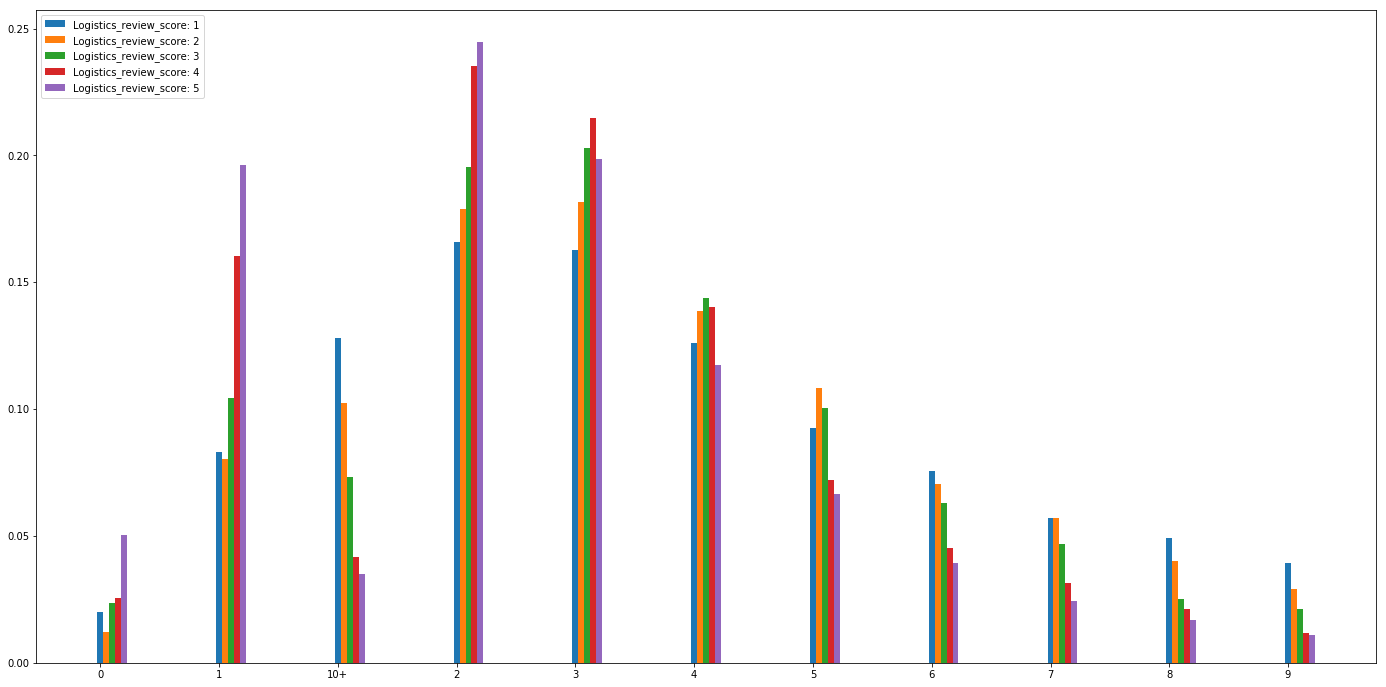

In [145]:
x_vals = range(11)
plt.figure(figsize=(24, 12))
dim_list = df_sent_times[df_sent_times['Logistics_review_score']==3].groupby('sent_duration').size().index.tolist()
plt.bar([x-0.05*2 for x in x_vals], 
        df_sent_times[df_sent_times['Logistics_review_score']==1].groupby('sent_duration').size().values/df_sent_times[df_sent_times['Logistics_review_score']==1].groupby('sent_duration').size().values.sum(), 
        width=0.05, tick_label=dim_list)
plt.bar([x-0.05 for x in x_vals], 
        df_sent_times[df_sent_times['Logistics_review_score']==2].groupby('sent_duration').size().values/df_sent_times[df_sent_times['Logistics_review_score']==2].groupby('sent_duration').size().values.sum(), 
        width=0.05)
plt.bar([x for x in x_vals], 
        df_sent_times[df_sent_times['Logistics_review_score']==3].groupby('sent_duration').size().values/df_sent_times[df_sent_times['Logistics_review_score']==3].groupby('sent_duration').size().values.sum(), 
        width=0.05)
plt.bar([x+0.05 for x in x_vals], 
        df_sent_times[df_sent_times['Logistics_review_score']==4].groupby('sent_duration').size().values/df_sent_times[df_sent_times['Logistics_review_score']==4].groupby('sent_duration').size().values.sum(), 
        width=0.05)
plt.bar([x+0.05*2 for x in x_vals], 
        df_sent_times[df_sent_times['Logistics_review_score']==5].groupby('sent_duration').size().values/df_sent_times[df_sent_times['Logistics_review_score']==5].groupby('sent_duration').size().values.sum(), 
        width=0.05)
plt.legend(['Logistics_review_score: '+str(x) for x in range(1, 6)], loc="upper left")
plt.show()


#### 不重複商品數所獲評分比例

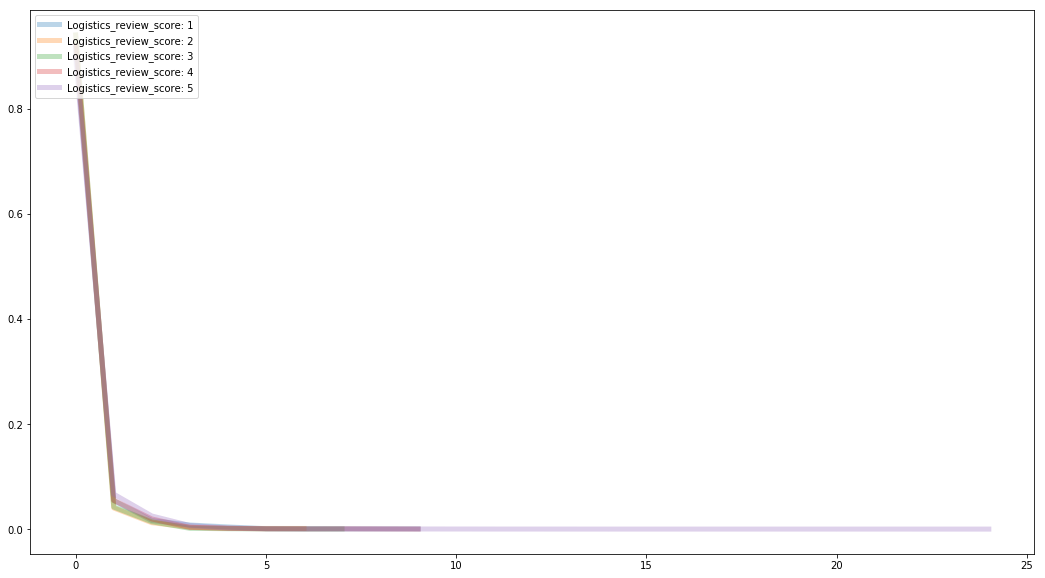

In [183]:
plt.figure(figsize=(18,10))
tmp_df_5 = df_sent_times[df_sent_times['Logistics_review_score']==1]
plt.plot(tmp_df_5.groupby(['items']).size().values/tmp_df_5.groupby(['items']).size().values.sum(), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['Logistics_review_score']==2]
plt.plot(tmp_df_5.groupby(['items']).size().values/tmp_df_5.groupby(['items']).size().values.sum(), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['Logistics_review_score']==3]
plt.plot(tmp_df_5.groupby(['items']).size().values/tmp_df_5.groupby(['items']).size().values.sum(), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['Logistics_review_score']==4]
plt.plot(tmp_df_5.groupby(['items']).size().values/tmp_df_5.groupby(['items']).size().values.sum(), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['Logistics_review_score']==5]
plt.plot(tmp_df_5.groupby(['items']).size().values/tmp_df_5.groupby(['items']).size().values.sum(), 
         alpha=0.3, linewidth=5)
plt.legend(['Logistics_review_score: '+str(x) for x in range(1, 6)], loc='upper left')
plt.show();


#### 總購買商品數所獲評分比例

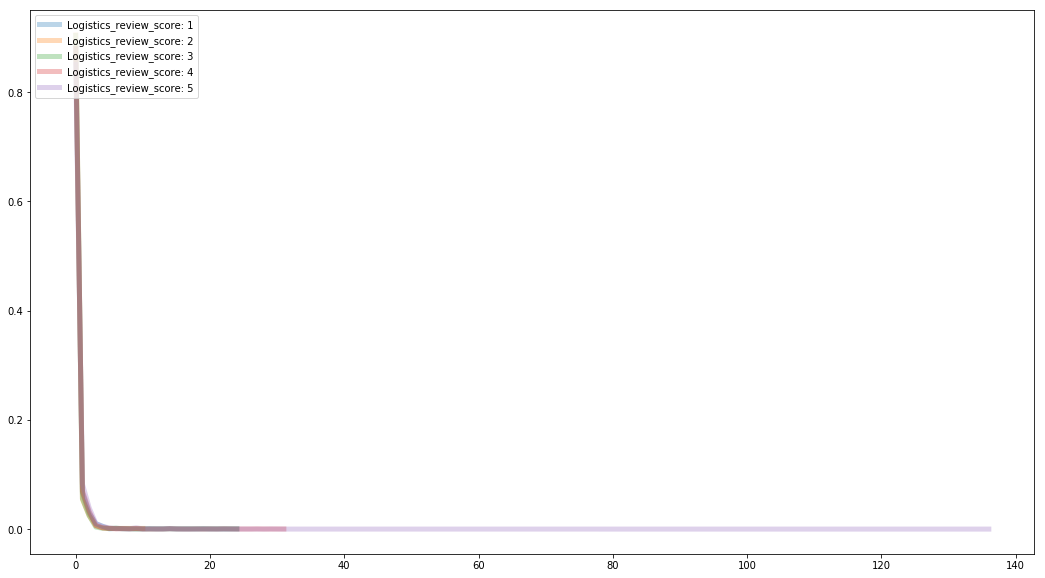

In [182]:
plt.figure(figsize=(18,10))
tmp_df_5 = df_sent_times[df_sent_times['Logistics_review_score']==1]
plt.plot(tmp_df_5.groupby(['quantity']).size().values/tmp_df_5.groupby(['quantity']).size().values.sum(), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['Logistics_review_score']==2]
plt.plot(tmp_df_5.groupby(['quantity']).size().values/tmp_df_5.groupby(['quantity']).size().values.sum(), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['Logistics_review_score']==3]
plt.plot(tmp_df_5.groupby(['quantity']).size().values/tmp_df_5.groupby(['quantity']).size().values.sum(), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['Logistics_review_score']==4]
plt.plot(tmp_df_5.groupby(['quantity']).size().values/tmp_df_5.groupby(['quantity']).size().values.sum(), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['Logistics_review_score']==5]
plt.plot(tmp_df_5.groupby(['quantity']).size().values/tmp_df_5.groupby(['quantity']).size().values.sum(), 
         alpha=0.3, linewidth=5)
plt.legend(['Logistics_review_score: '+str(x) for x in range(1, 6)], loc='upper left')
plt.show();


#### 不同購買金額所獲評分比例

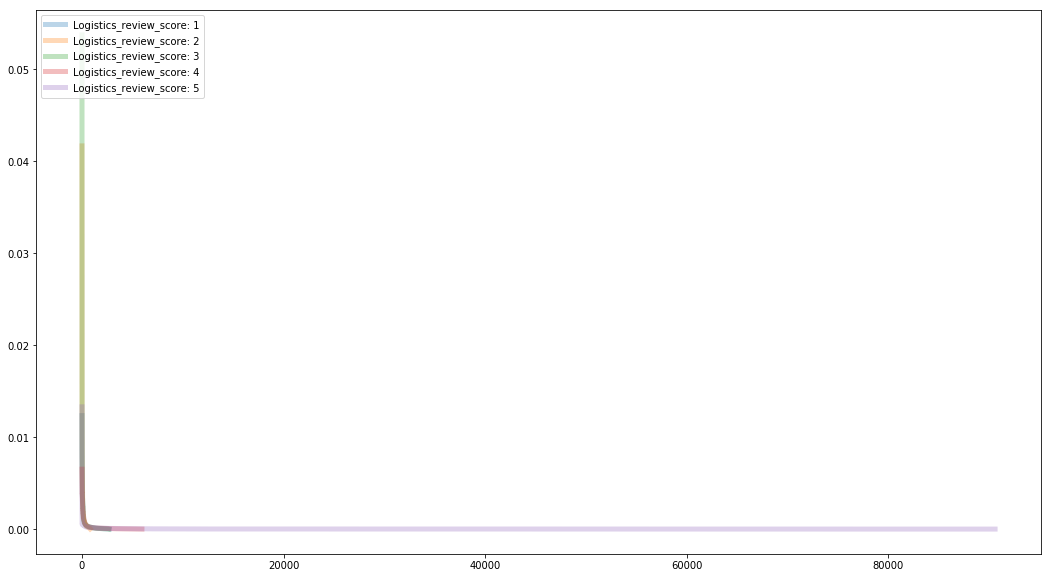

In [209]:
plt.figure(figsize=(18,10))
tmp_df_5 = df_sent_times[df_sent_times['Logistics_review_score']==1]
plt.plot(np.array(sorted(tmp_df_5['purchase_value'].values.tolist(), reverse=True))/sum(tmp_df_5['purchase_value'].values.tolist()), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['Logistics_review_score']==2]
plt.plot(np.array(sorted(tmp_df_5['purchase_value'].values.tolist(), reverse=True))/sum(tmp_df_5['purchase_value'].values.tolist()), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['Logistics_review_score']==3]
plt.plot(np.array(sorted(tmp_df_5['purchase_value'].values.tolist(), reverse=True))/sum(tmp_df_5['purchase_value'].values.tolist()), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['Logistics_review_score']==4]
plt.plot(np.array(sorted(tmp_df_5['purchase_value'].values.tolist(), reverse=True))/sum(tmp_df_5['purchase_value'].values.tolist()), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['Logistics_review_score']==5]
plt.plot(np.array(sorted(tmp_df_5['purchase_value'].values.tolist(), reverse=True))/sum(tmp_df_5['purchase_value'].values.tolist()), 
         alpha=0.3, linewidth=5)
plt.legend(['Logistics_review_score: '+str(x) for x in range(1, 6)], loc='upper left')
plt.show();


### EDA
原始資料筆數過多，目前先抽樣100000筆不重複訂單當作觀察
數值指標/維度：
- 物流評分
- 運送天數
- 運送商品數
- 訂單總金額
- ~~該 merchant 的平均物流評分~~
- ~~該 merchant 的平均流量~~

類別維度：
- 下訂單時間
    - 月份
    - 星期幾
    - 日期(月初、月中、月末)
- 到貨時間
    - 月份
    - 星期幾
    - 日期(月初、月中、月末)

    
``` 
`order.csv`
- Different items are separated by “;”
- the information for each item is separated by “:” (item_id:quantity:payment_amount)
- Payment amount = total payment for all quantity of this item
```
    

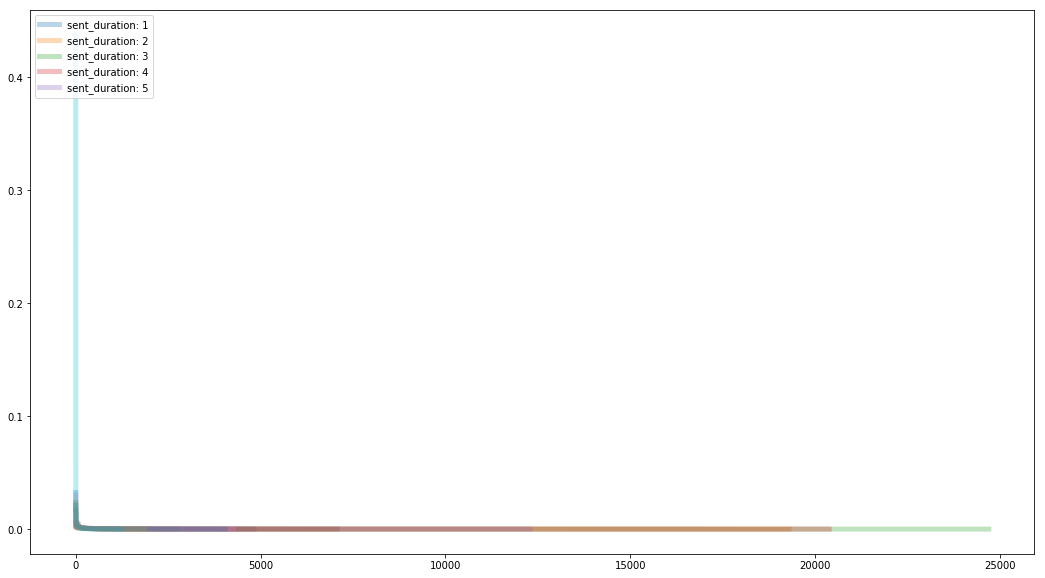

In [214]:
plt.figure(figsize=(18,10))
tmp_df_5 = df_sent_times[df_sent_times['sent_duration']=='0']
plt.plot(np.array(sorted(tmp_df_5['purchase_value'].values.tolist(), reverse=True))/sum(tmp_df_5['purchase_value'].values.tolist()), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['sent_duration']=='1']
plt.plot(np.array(sorted(tmp_df_5['purchase_value'].values.tolist(), reverse=True))/sum(tmp_df_5['purchase_value'].values.tolist()), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['sent_duration']=='2']
plt.plot(np.array(sorted(tmp_df_5['purchase_value'].values.tolist(), reverse=True))/sum(tmp_df_5['purchase_value'].values.tolist()), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['sent_duration']=='3']
plt.plot(np.array(sorted(tmp_df_5['purchase_value'].values.tolist(), reverse=True))/sum(tmp_df_5['purchase_value'].values.tolist()), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['sent_duration']=='4']
plt.plot(np.array(sorted(tmp_df_5['purchase_value'].values.tolist(), reverse=True))/sum(tmp_df_5['purchase_value'].values.tolist()), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['sent_duration']=='5']
plt.plot(np.array(sorted(tmp_df_5['purchase_value'].values.tolist(), reverse=True))/sum(tmp_df_5['purchase_value'].values.tolist()), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['sent_duration']=='6']
plt.plot(np.array(sorted(tmp_df_5['purchase_value'].values.tolist(), reverse=True))/sum(tmp_df_5['purchase_value'].values.tolist()), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['sent_duration']=='7']
plt.plot(np.array(sorted(tmp_df_5['purchase_value'].values.tolist(), reverse=True))/sum(tmp_df_5['purchase_value'].values.tolist()), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['sent_duration']=='8']
plt.plot(np.array(sorted(tmp_df_5['purchase_value'].values.tolist(), reverse=True))/sum(tmp_df_5['purchase_value'].values.tolist()), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['sent_duration']=='9']
plt.plot(np.array(sorted(tmp_df_5['purchase_value'].values.tolist(), reverse=True))/sum(tmp_df_5['purchase_value'].values.tolist()), 
         alpha=0.3, linewidth=5)
tmp_df_5 = df_sent_times[df_sent_times['sent_duration']=='10+']
plt.plot(np.array(sorted(tmp_df_5['purchase_value'].values.tolist(), reverse=True))/sum(tmp_df_5['purchase_value'].values.tolist()), 
         alpha=0.3, linewidth=5)
plt.legend(['sent_duration: '+str(x) for x in range(1, 6)], loc='upper left')
plt.show();
